In [ ]:
import pandas as pd
from scipy.stats import zscore
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dataset
df = pd.read_csv('FilteredDataset.csv')
df

,Dementia,SEX,TOBAC100,SMOKYRS,Depression,MOCATOTS (cognitive test score),NACCFAM,DIABETES,HYPERTEN,NACCBMI,EDUC,ALCFREQ,CVHATT,CVCHF,MARISTAT
0,0,1,0,0,0,25,1,0,1,32.4,16,2,0,0,1
1,0,1,-4,-4,0,23,1,-4,-4,30.7,16,-4,-4,-4,1
2,0,1,0,0,-4,23,0,0,0,23.7,16,4,0,0,1
3,1,2,0,0,0,5,-4,9,9,888.8,16,8,9,9,1
4,0,1,0,0,0,28,9,0,0,19.0,12,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195191,1,2,0,0,1,-4,9,1,1,888.8,13,-4,0,0,4
195192,0,1,1,40,0,-4,9,0,1,26.8,13,-4,1,0,2
195193,1,1,1,40,0,-4,9,0,1,27.1,13,-4,1,1,2
195194,1,1,1,40,0,-4,9,0,1,25.5,13,-4,2,1,2


In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Dementia', 'SEX', 'TOBAC100', 'SMOKYRS', 'Depression',
       'MOCATOTS (cognitive test score)', 'NACCFAM', 'DIABETES', 'HYPERTEN',
       'NACCBMI', 'EDUC', 'ALCFREQ', 'CVHATT', 'CVCHF', 'MARISTAT'],
      dtype='object')

In [ ]:
# Calculate Z-scores
z_scores = df[numerical_cols].apply(zscore)
z_scores

,Dementia,SEX,TOBAC100,SMOKYRS,Depression,MOCATOTS (cognitive test score),NACCFAM,DIABETES,HYPERTEN,NACCBMI,EDUC,ALCFREQ,CVHATT,CVCHF,MARISTAT
0,-0.646926,-1.177544,0.485152,-0.347902,-0.011759,1.111204,-0.102084,0.651193,0.896005,-0.230766,0.003707,1.935618,0.666111,0.710953,-0.602548
1,-0.646926,-1.177544,-1.235088,-0.560875,-0.011759,0.991449,-0.102084,-1.272214,-1.267224,-0.238430,0.003707,-0.310474,-1.267557,-1.282785,-0.602548
2,-0.646926,-1.177544,0.485152,-0.347902,-3.363903,0.991449,-0.520988,0.651193,0.463360,-0.269987,0.003707,2.684315,0.666111,0.710953,-0.602548
3,1.545771,0.849225,0.485152,-0.347902,-0.011759,-0.086349,-2.196603,4.978858,4.357173,3.630042,0.003707,4.181710,5.016865,5.196862,-0.602548
4,-0.646926,-1.177544,0.485152,-0.347902,-0.011759,1.290837,3.249147,0.651193,0.463360,-0.291176,-0.593239,1.186920,0.666111,0.710953,0.946934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195191,1.545771,0.849225,0.485152,-0.347902,0.826277,-0.625248,3.249147,1.132045,0.896005,3.630042,-0.444003,-0.310474,0.666111,0.710953,1.721675
195192,-0.646926,-1.177544,0.915211,1.781831,-0.011759,-0.625248,3.249147,0.651193,0.896005,-0.256012,-0.444003,-0.310474,1.149529,0.710953,0.172193
195193,1.545771,-1.177544,0.915211,1.781831,-0.011759,-0.625248,3.249147,0.651193,0.896005,-0.254660,-0.444003,-0.310474,1.149529,1.209387,0.172193
195194,1.545771,-1.177544,0.915211,1.781831,-0.011759,-0.625248,3.249147,0.651193,0.896005,-0.261873,-0.444003,-0.310474,1.632946,1.209387,0.172193


In [ ]:
# Identify rows with outliers
rows_with_outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of rows with outliers: {rows_with_outliers.sum()}")

Number of rows with outliers: 50649


In [ ]:
# Remove rows with outliers
df_cleaned = df[~rows_with_outliers]
df_cleaned

,Dementia,SEX,TOBAC100,SMOKYRS,Depression,MOCATOTS (cognitive test score),NACCFAM,DIABETES,HYPERTEN,NACCBMI,EDUC,ALCFREQ,CVHATT,CVCHF,MARISTAT
0,0,1,0,0,0,25,1,0,1,32.4,16,2,0,0,1
1,0,1,-4,-4,0,23,1,-4,-4,30.7,16,-4,-4,-4,1
7,1,1,-4,-4,0,17,0,-4,-4,27.8,20,-4,-4,-4,1
8,0,1,0,0,0,28,0,0,1,26.4,18,0,0,0,1
11,0,2,0,0,0,23,1,0,1,34.0,18,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195182,1,1,1,55,0,-4,1,0,0,24.8,16,-4,0,0,1
195183,1,1,1,56,0,-4,1,0,0,26.6,16,-4,0,0,1
195184,1,1,1,57,0,-4,1,0,0,26.2,16,-4,0,0,1
195185,1,1,-4,-4,0,-4,1,-4,-4,27.7,16,-4,-4,-4,1


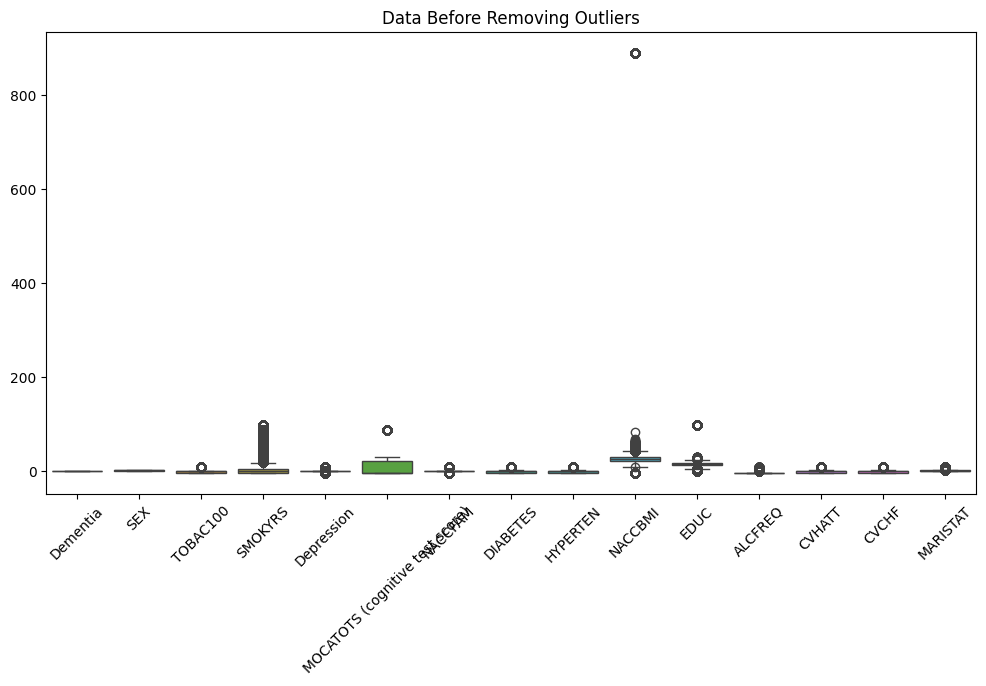

In [36]:
# Visualize data before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Data Before Removing Outliers")
plt.xticks(rotation=45)
plt.show()

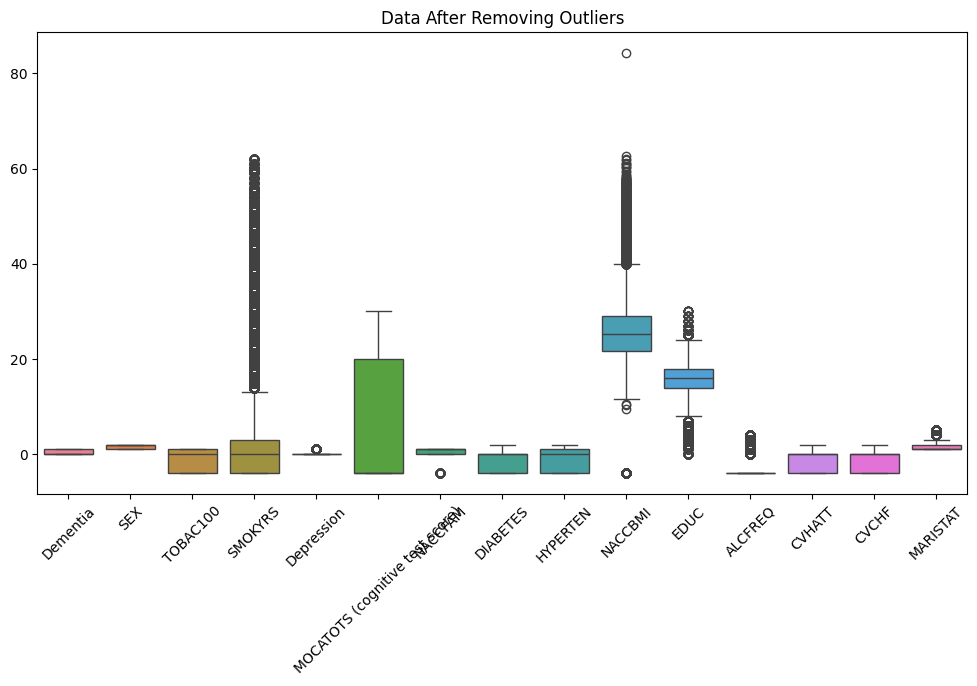

In [ ]:
# Visualize data after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numerical_cols])
plt.title("Data After Removing Outliers")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate Z-scores for the 'NACCBMI' column
z_scores = zscore(df_cleaned['NACCBMI'])

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Apply normalization only to outliers
mean = df_cleaned['NACCBMI'].mean()
std = df_cleaned['NACCBMI'].std()
df_cleaned.loc[outliers, 'NACCBMI'] = (df_cleaned.loc[outliers, 'NACCBMI'] - mean) / std
df_cleaned

,Dementia,SEX,TOBAC100,SMOKYRS,Depression,MOCATOTS (cognitive test score),NACCFAM,DIABETES,HYPERTEN,NACCBMI,EDUC,ALCFREQ,CVHATT,CVCHF,MARISTAT
0,0,1,0,0,0,25,1,0,1,32.4,16,2,0,0,1
1,0,1,-4,-4,0,23,1,-4,-4,30.7,16,-4,-4,-4,1
7,1,1,-4,-4,0,17,0,-4,-4,27.8,20,-4,-4,-4,1
8,0,1,0,0,0,28,0,0,1,26.4,18,0,0,0,1
11,0,2,0,0,0,23,1,0,1,34.0,18,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195182,1,1,1,55,0,-4,1,0,0,24.8,16,-4,0,0,1
195183,1,1,1,56,0,-4,1,0,0,26.6,16,-4,0,0,1
195184,1,1,1,57,0,-4,1,0,0,26.2,16,-4,0,0,1
195185,1,1,-4,-4,0,-4,1,-4,-4,27.7,16,-4,-4,-4,1


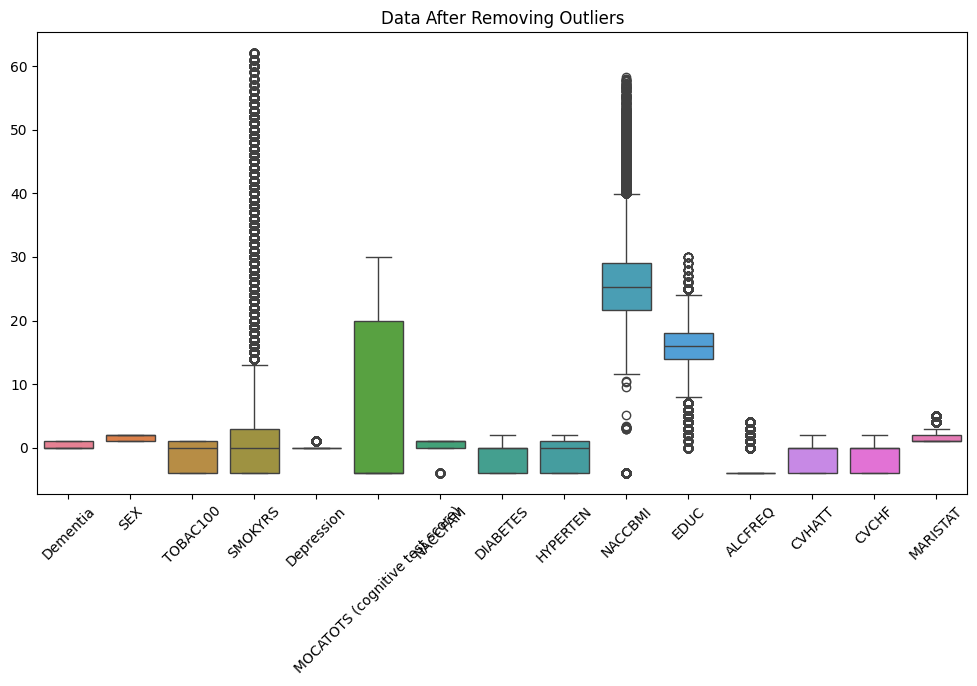

In [ ]:
# Visualize data after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numerical_cols])
plt.title("Data After Removing Outliers")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Select the target variable (first column) and features (rest of the columns)
Y = df_cleaned.iloc[:, 0]
X = df_cleaned.iloc[:, 1:]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

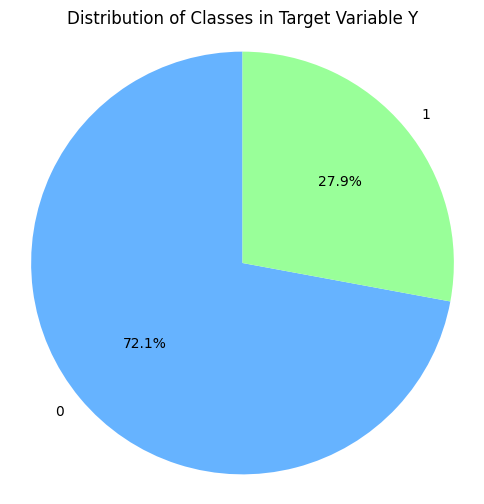

In [ ]:
# Get the counts of each class
class_counts = Y.value_counts()
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Classes in Target Variable Y')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
#Resampling using SMOTE (oversample the minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [ ]:
#Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Create the Random Forest Classifier with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
#Train the model
model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Step 5: Make predictions on the test set
Y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC and PR-AUC

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
#Evaluate the model
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print(f"ROC AUC Score: {roc_auc_score(Y_test, y_prob):.2f}")
print(f"Average Precision Score: {average_precision_score(Y_test, y_prob):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     20828
           1       0.79      0.84      0.81     20853

    accuracy                           0.80     41681
   macro avg       0.80      0.80      0.80     41681
weighted avg       0.80      0.80      0.80     41681

ROC AUC Score: 0.88
Average Precision Score: 0.87


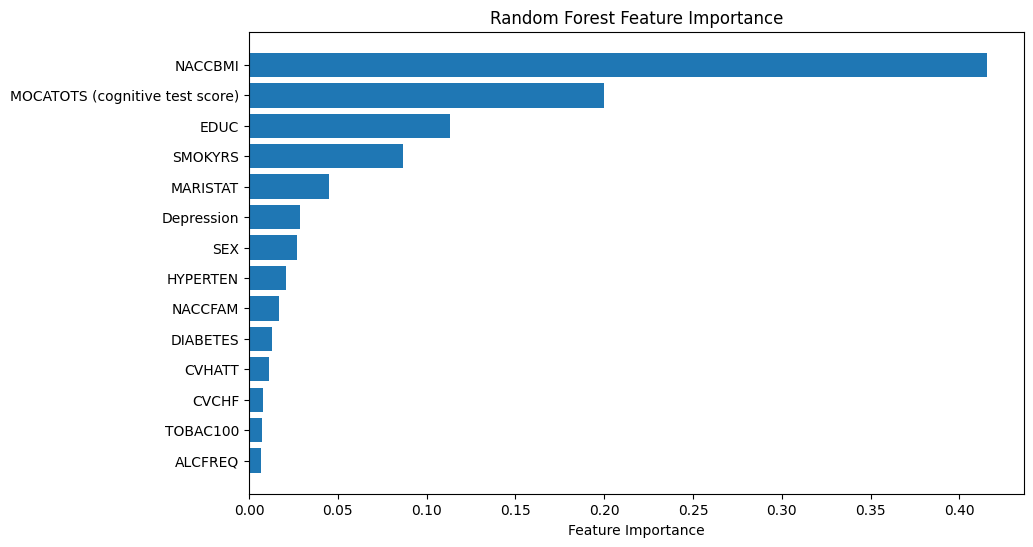

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
# Save the cleaned DataFrame as a CSV file
df_cleaned.to_csv('/content/df_cleaned.csv', index=False)

# Download the file
from google.colab import files
files.download('/content/df_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>